#    Install and Import Dependencies

In [70]:
from fbprophet import Prophet
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt

# Read in Data and process Dates

In [71]:
# runs all the data for AAPL
aapl = web.get_data_yahoo('AAPL', 2012, 2022)

#runs the first 5 rows
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674


In [72]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-14,135.000000,131.660004,134.940002,132.029999,87222800.0,132.029999
2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,134.500000
2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004
2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,134.839996
2021-04-20,135.529999,131.811493,135.020004,133.110001,93002207.0,133.110001


In [73]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2339.000000,2339.000000,2339.000000,2339.000000,2.339000e+03,2339.000000
mean,42.086627,41.203503,41.649381,41.661350,2.250675e+08,39.973177
std,29.168837,28.352620,28.784993,28.778463,1.783713e+08,29.419478
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.191197
25%,23.193393,22.868750,23.083929,23.047500,1.087790e+08,20.500263
50%,31.219999,30.635000,30.962500,30.844999,1.625796e+08,28.411337
75%,48.220001,47.553751,47.908751,47.882500,2.766638e+08,46.697630
max,145.089996,141.369995,143.600006,143.160004,1.506120e+09,142.946396


In [74]:
aapl=aapl.reset_index()

In [75]:
aapl[['ds','y']]=aapl[['Date','Adj Close']]

In [76]:
aapl.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
2334,2021-04-14,135.000000,131.660004,134.940002,132.029999,87222800.0,132.029999,2021-04-14,132.029999
2335,2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,134.500000,2021-04-15,134.500000
2336,2021-04-16,134.669998,133.279999,134.300003,134.160004,84818500.0,134.160004,2021-04-16,134.160004
2337,2021-04-19,135.470001,133.339996,133.509995,134.839996,93996100.0,134.839996,2021-04-19,134.839996
2338,2021-04-20,135.529999,131.811493,135.020004,133.110001,93002207.0,133.110001,2021-04-20,133.110001


In [77]:
aapl.head()

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659,2012-01-03,12.650659
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646,2012-01-04,12.718646
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850,2012-01-05,12.859850
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284,2012-01-06,12.994284
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674,2012-01-09,12.973674


In [78]:
aapl.shape

(2339, 9)

#    Train Model

In [80]:
model = Prophet(
    growth="linear",
    #holidays=holidays,
    #seasonality_mode="multiplicative",
    changepoint_prior_scale=30,
    seasonality_prior_scale=35,
    ###cap=3.00,
    ###floor=.65*125,
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    ).add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=55
    ).add_seasonality(
        name='daily',
        period=1,
        fourier_order=15
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20
    ).add_seasonality(
        name='quarterly',
        period=365.25/4,
        fourier_order=5,
        prior_scale=15)
# model=m.fit(aapl)
model.fit(aapl)

# Forecast Away

In [81]:
future = model.make_future_dataframe(periods=90)
# model.make_future_dataframe(periods=30)

In [82]:
future.head()

,ds
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09


In [83]:
future.tail()

,ds
2424,2021-07-15
2425,2021-07-16
2426,2021-07-17
2427,2021-07-18
2428,2021-07-19


In [84]:
fcst = model.predict(future)

In [85]:
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,12.351957,9.471945,18.624575,12.351957,12.351957,1.771268,1.771268,1.771268,1.140188,...,0.305566,0.305566,0.305566,3.059937,3.059937,3.059937,0.0,0.0,0.0,14.123225
1,2012-01-04,12.440867,8.709510,18.395619,12.440867,12.440867,1.189696,1.189696,1.189696,1.140188,...,0.300868,0.300868,0.300868,2.938843,2.938843,2.938843,0.0,0.0,0.0,13.630564
2,2012-01-05,12.529778,8.919343,18.457025,12.529778,12.529778,0.978017,0.978017,0.978017,1.140188,...,0.228546,0.228546,0.228546,2.789839,2.789839,2.789839,0.0,0.0,0.0,13.507794
3,2012-01-06,12.618688,9.106293,18.942148,12.618688,12.618688,1.054019,1.054019,1.054019,1.140188,...,0.145547,0.145547,0.145547,2.617383,2.617383,2.617383,0.0,0.0,0.0,13.672707
4,2012-01-09,12.885418,9.470651,19.062199,12.885418,12.885418,1.326260,1.326260,1.326260,1.140188,...,0.235690,0.235690,0.235690,2.013461,2.013461,2.013461,0.0,0.0,0.0,14.211678


In [86]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2424,2021-07-15,149.945094,143.588370,156.065922
2425,2021-07-16,150.380501,144.075460,156.783704
2426,2021-07-17,149.511968,142.722655,155.833285
2427,2021-07-18,149.177368,142.473885,155.974716
2428,2021-07-19,149.264945,142.457532,155.595904


In [87]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('appleforecast.csv')

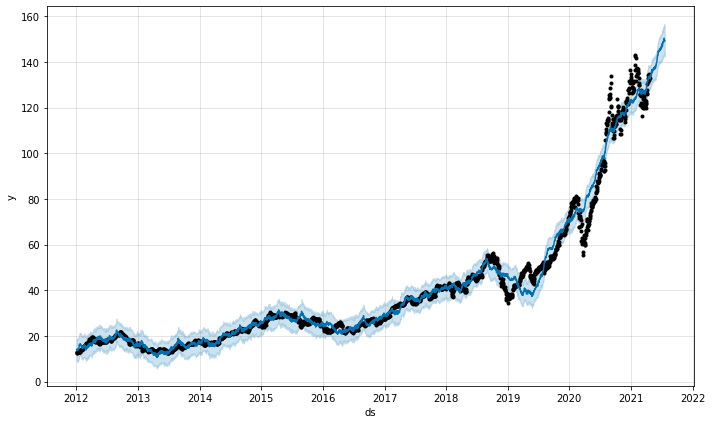

In [88]:
model.plot(fcst)
plt.show()

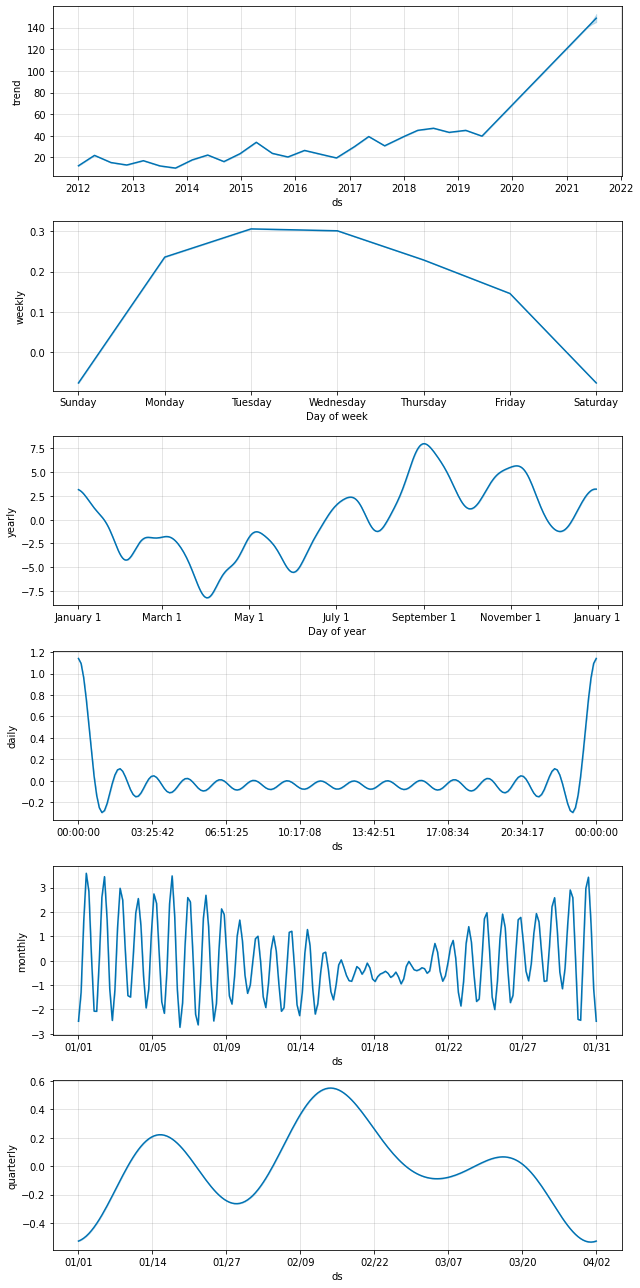

In [89]:
fig = model.plot_components(fcst)